# Housing Prices Prediction

**Xinran Wang**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

The result of the linear regression model shows the columns **YearRemodAdd,TotalBsmtSF,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt** have a strong linear correlation with the predicted column, **SalePrice**. In conclusion, as the selected attributes increase, the **SalePrice** increases accordingly, and vice versa.

[Back to top](#Index)


## 1. Introduction


This project is designed to find out the most appropriate independent variables linearly correlated to the dependent variable - housing prices we would like to discover in the houseSmallData datasets. To generate an accurate and rigorous result of the linear model to predict the housing prices, I will apply general steps of building a linear regression model using Python 3. Below is a brief walkthrough of the steps.
1. Import data
2. Data Preparation
3. Exploratory Data Analysis
4. Data Modeling
5. Model Validation
6. Analysis and Conclusion

Here are the independent variables I choose to build the linear regression. All of them are numerical.
 
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* TotalBsmtSF: Total square feet of basement area
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* GarageYrBlt: Year garage was built

[Back to top](#Index)

## 2. The Data

For each of the steps below, make sure you include a description of your steps as well as your complete code. 

In [267]:
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[Back to top](#Index)

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

In [268]:
#load and read the data, print a brief description of the dataset.
df = pd.read_csv(r'C:\Users\kisek\OneDrive\Desktop\job hunting\MIT xPRO\houseSmallData.csv')
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting housing prices.


Include a description of the results displayed by each *plot*.

In [269]:
#check number of rows and columns of the dataset
df.shape

(100, 82)

In [270]:
#interpret 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   Id             100 non-null    int64  
 2   MSSubClass     100 non-null    int64  
 3   MSZoning       100 non-null    object 
 4   LotFrontage    86 non-null     float64
 5   LotArea        100 non-null    int64  
 6   Street         100 non-null    object 
 7   Alley          6 non-null      object 
 8   LotShape       100 non-null    object 
 9   LandContour    100 non-null    object 
 10  Utilities      100 non-null    object 
 11  LotConfig      100 non-null    object 
 12  LandSlope      100 non-null    object 
 13  Neighborhood   100 non-null    object 
 14  Condition1     100 non-null    object 
 15  Condition2     100 non-null    object 
 16  BldgType       100 non-null    object 
 17  HouseStyle     100 non-null    object 
 18  OverallQual

##### Below are five histograms showing the distribution of the five independent variables.

<span style="color:red">
YearRemodAdd: remodel happened mostly before 1970s and after 1990s.

(array([14.,  8.,  9.,  8.,  2.,  4.,  3., 10., 17., 25.]),
 array([1950. , 1955.9, 1961.8, 1967.7, 1973.6, 1979.5, 1985.4, 1991.3,
        1997.2, 2003.1, 2009. ]),
 <BarContainer object of 10 artists>)

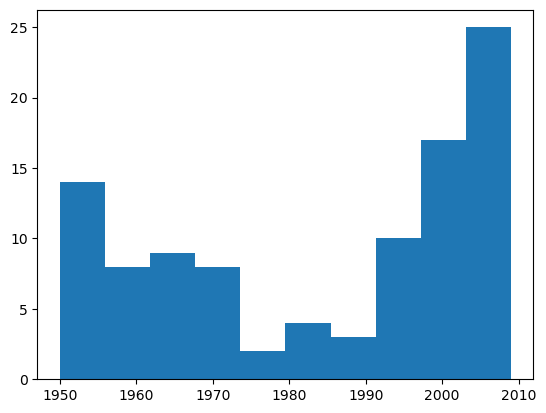

In [271]:
plt.hist(df['YearRemodAdd'])

<span style="color:red">
TotalBsmtSF: Total basement square feet is likely normal distributed. The mean of it is 1000.

(array([ 3.,  3.,  8., 20., 26., 18.,  9., 10.,  2.,  1.]),
 array([   0. ,  222.3,  444.6,  666.9,  889.2, 1111.5, 1333.8, 1556.1,
        1778.4, 2000.7, 2223. ]),
 <BarContainer object of 10 artists>)

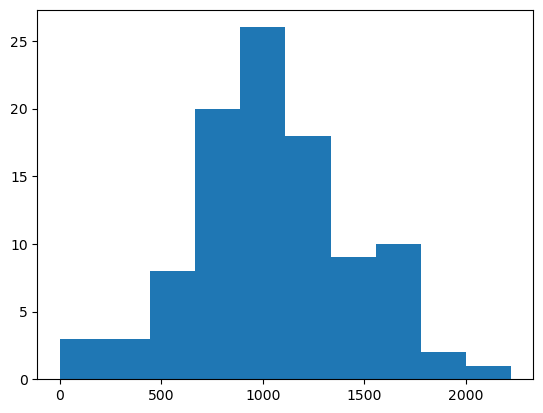

In [272]:
plt.hist(df['TotalBsmtSF'])

<span style="color:red">
BedroomAbvGr: Most grade of bedroom is greater than 2, and the most frequent grade is 3.

(array([ 1.,  0.,  3.,  0.,  0., 30.,  0., 56.,  0., 10.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

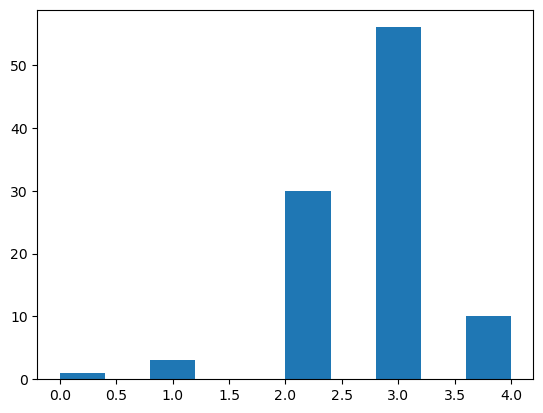

In [273]:
plt.hist(df['BedroomAbvGr'])

<span style="color:red">
GarageYrBlt: garages are generally built after 1940s and have a rapid growth after 2000. This could be considered as the year whether vehicles become popular among residents.

(array([ 1.,  5.,  2.,  2.,  6., 15., 15.,  5., 14., 29.]),
 array([1900. , 1910.9, 1921.8, 1932.7, 1943.6, 1954.5, 1965.4, 1976.3,
        1987.2, 1998.1, 2009. ]),
 <BarContainer object of 10 artists>)

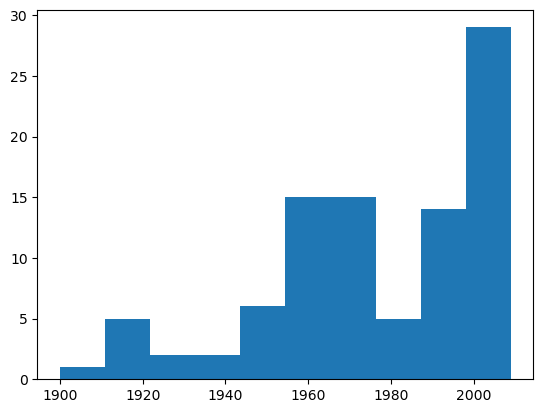

In [274]:
plt.hist(df['GarageYrBlt'])

<span style="color:red">
TotRmsAbvGrd: compared with the low grade of bedroom, total room above grade is relatively higher, where we can see most of the grade is above 5.

(array([ 8., 21., 36.,  0., 18.,  8.,  0.,  7.,  1.,  1.]),
 array([ 4. ,  4.7,  5.4,  6.1,  6.8,  7.5,  8.2,  8.9,  9.6, 10.3, 11. ]),
 <BarContainer object of 10 artists>)

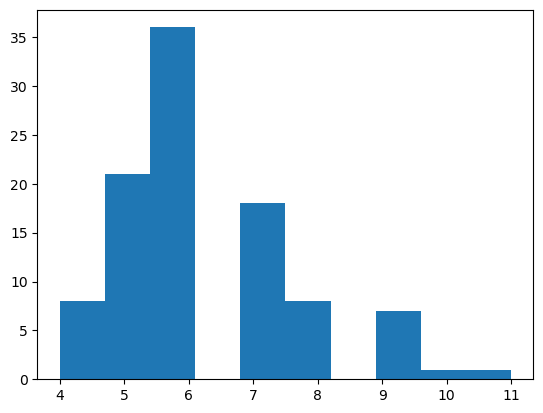

In [275]:
plt.hist(df['TotRmsAbvGrd'])

To get a better overall and clear view of all the 5 columns, we can put them into one image.

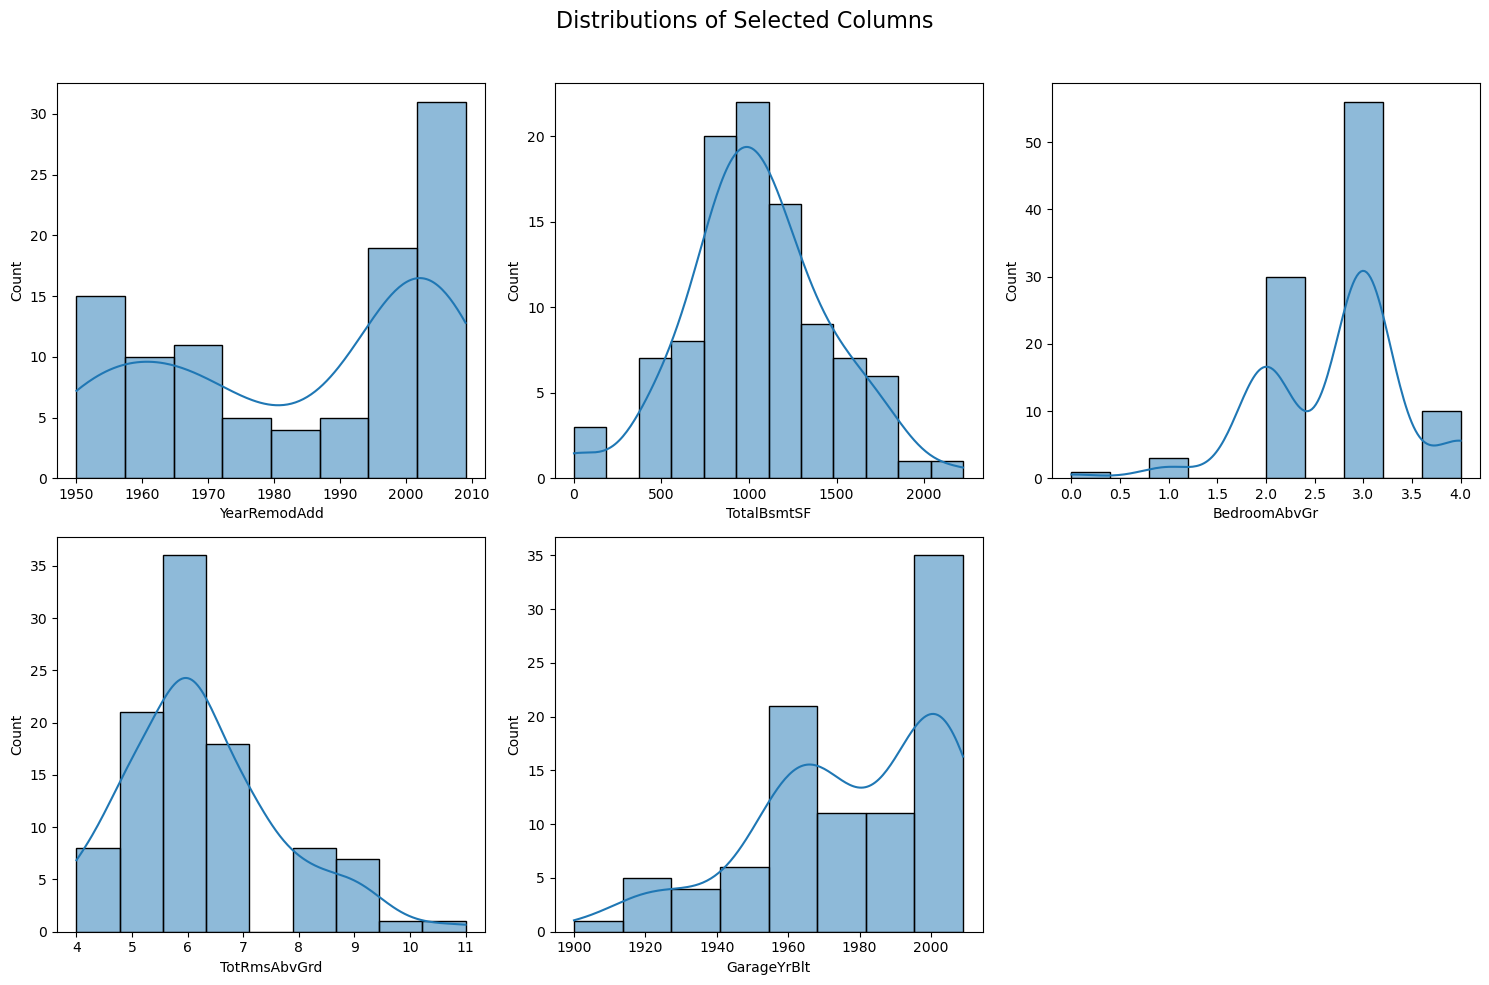

In [276]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distributions of Selected Columns', fontsize=16)

# Plot the distributions
sns.histplot(df['YearRemodAdd'], kde=True, ax=axes[0, 0])
sns.histplot(df['TotalBsmtSF'], kde=True, ax=axes[0, 1])
sns.histplot(df['BedroomAbvGr'], kde=True, ax=axes[0, 2])
sns.histplot(df['TotRmsAbvGrd'], kde=True, ax=axes[1, 0])
sns.histplot(df['GarageYrBlt'], kde=True, ax=axes[1, 1])

# Remove the empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the image to a local file
plt.savefig('numeric_columns_distributions.png')

# Display the plot
plt.show()

[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


<span style="color:red">
There exists missing and null values in the table,to better understand the linear relationship between the independent and dependent variables, we first use only the numeric columns exclude boolean columns to build the model.

In [277]:
#Extract the numeric columns
df_num = df.select_dtypes(include=[np.number])

In [278]:
#Drop the duplicates. As a result, there is no duplicated records in this dataset.
df_num = df_num.drop_duplicates()

In [279]:
#Since we are using all numeric values, instead of dropping the null values, it would be more reasonable to fill the null values with zero value.
df_num = df_num.fillna(0)
df_num.shape

(100, 40)

Now that the data is cleaned, it's time for us to split the data into train&test.

In [280]:
#split the train and test data into 3:7
train = df_num.iloc[0:30,:]
test = df_num.iloc[0:70,:]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     30 non-null     int64  
 1   Id             30 non-null     int64  
 2   MSSubClass     30 non-null     int64  
 3   LotFrontage    30 non-null     float64
 4   LotArea        30 non-null     int64  
 5   OverallQual    30 non-null     int64  
 6   OverallCond    30 non-null     int64  
 7   YearBuilt      30 non-null     int64  
 8   YearRemodAdd   30 non-null     int64  
 9   MasVnrArea     30 non-null     float64
 10  BsmtFinSF1     30 non-null     int64  
 11  BsmtFinSF2     30 non-null     int64  
 12  BsmtUnfSF      30 non-null     int64  
 13  TotalBsmtSF    30 non-null     int64  
 14  1stFlrSF       30 non-null     int64  
 15  2ndFlrSF       30 non-null     int64  
 16  LowQualFinSF   30 non-null     int64  
 17  GrLivArea      30 non-null     int64  
 18  BsmtFullBath

[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.

In [281]:
#generate correlation between selected columns and SalePrice
selected_columns = ['YearRemodAdd', 'TotalBsmtSF', 'BedroomAbvGr','GarageYrBlt','TotRmsAbvGrd']
corr_matrix = train[selected_columns + ['SalePrice']].corr()
correlation_with_saleprice = corr_matrix.loc['SalePrice', selected_columns]
correlation_with_saleprice

YearRemodAdd    0.717199
TotalBsmtSF     0.696113
BedroomAbvGr    0.660959
GarageYrBlt     0.672778
TotRmsAbvGrd    0.743459
Name: SalePrice, dtype: float64

The correlation between the selected columns and _SalePrice_ are listed above.Those columns are tested and compared with columns of similar attribute to get a closer _corr()_ value to 1 or -1, which represents they are strongly positive related or negative related.


[Back to top](#Index)

## 3. Project Description




The variables I selected are based on the complement of Dr. Williams' choices and comparison of similar attributes. For instance, Dr. Williams explored several attributes of garage, I added one more of them, garage built year. I also chose some new elements such as properties above grade. After selecting a range of my chosen variables, I used corr() function to see their correlation with _SalePrice_ and tried to use those correlation are close to 1 or -1.

[Back to top](#Index)

### 3.1 Linear Regression

#### Steps of applying a linear regression model with Python
    
1. Import libraries    
2. Create a Linear Regression Model    
3. Train the model    
4. Make Predictions    
5. Evaluate Model Performance
6. Residual Analysis
7. Visualize Results

#### Why we should use linear regression in this project?
It is straightforward to measure the correlation between the numeric dependent variable, _SalePrice_ and other numeric variables. Its simplicity, coupled with effectiveness in capturing linear patterns, makes it a foundational tool in data analysis and machine learning. The implementation in Python using scikit-learn streamlines the process, allowing for rapid development and evaluation of predictive models.

[Back to top](#Index)

### 3.2 Analysis 

In [282]:
#define X,Y for the linear regression model
X = train[selected_columns]
Y = train['SalePrice']
Y = Y.to_frame(name='SalePrice')

In [283]:
#Apply the linear regression model building steps including evaluate model performance
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.8506814523097782


(array([4., 2., 3., 2., 5., 3., 3., 2., 4., 2.]),
 array([-46520.52643901, -36835.89433099, -27151.26222297, -17466.63011496,
         -7781.99800694,   1902.63410108,  11587.26620909,  21271.89831711,
         30956.53042513,  40641.16253315,  50325.79464116]),
 <BarContainer object of 10 artists>)

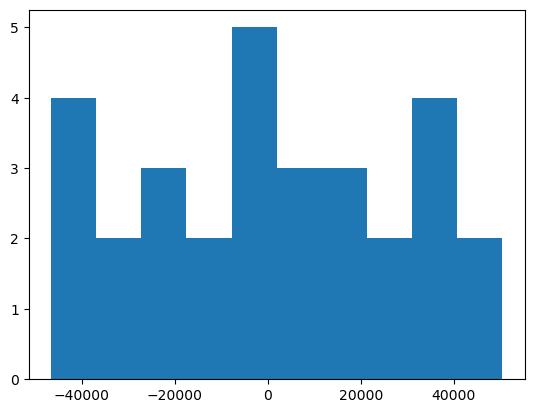

In [284]:
#residual analysis
plt.hist(Y - predictions)

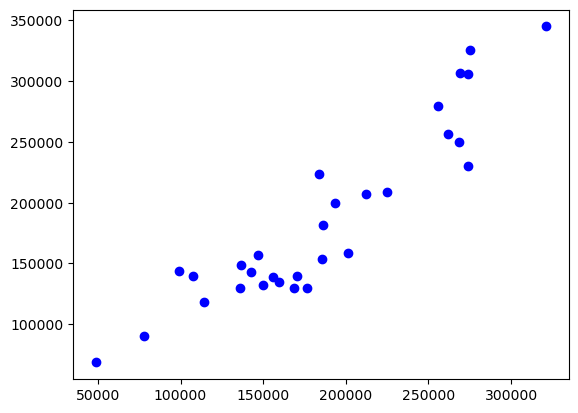

In [285]:
#visualize the result with scatterplot
plt.scatter(predictions, Y, color = 'blue')

[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



**Model Results**

The R-squared value of 0.85 indicates a strong linear relationship between the independent and dependent variables. However, the non-normal distribution of residuals suggests that the model may not capture certain patterns or outliers. Further exploration, such as examining influential data points or considering non-linear transformations, could enhance the model's performance.

In the previous steps, I tried to update the fillna() function to dropna() or simply withdraw this code, but it would not influence the residuals distribution. In the variables I selected, there should exist outliers that influence the outcome.

In conclusion, the script successfully builds a linear regression model with a high R-squared value compared with Dr.Williams' model, but the non-normal distribution of residuals warrants further investigation to uncover potential areas for model improvement. This iterative process of model evaluation and refinement is common in data analysis and machine learning to ensure robust and accurate predictions.

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

Apply exact the same methodology and steps on the _**jest.csv**_ to generate the linear model. 

In [286]:
df_new = pd.read_csv(r'C:\Users\kisek\OneDrive\Desktop\job hunting\MIT xPRO\jtest.csv')
df_new = df_new.fillna(0)
df_new

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,0.0,10603,Pave,0,IR1,Lvl,...,0,0,0,0,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,0,Reg,Lvl,...,0,0,0,0,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,0,Reg,Bnk,...,0,0,0,0,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,0,IR1,Lvl,...,0,0,0,0,0,5,2010,WD,Normal,198900
4,104,105,50,RM,0.0,7758,Pave,0,Reg,Lvl,...,0,0,0,0,0,6,2007,WD,Normal,169500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,195,196,160,RL,24.0,2280,Pave,0,Reg,Lvl,...,0,0,0,0,0,7,2009,WD,Normal,148500
96,196,197,20,RL,79.0,9416,Pave,0,Reg,Lvl,...,0,0,0,0,0,9,2007,New,Partial,311872
97,197,198,75,RL,174.0,25419,Pave,0,Reg,Lvl,...,512,Ex,GdPrv,0,0,3,2006,WD,Abnorml,235000
98,198,199,75,RM,92.0,5520,Pave,0,Reg,Lvl,...,0,0,MnPrv,0,0,7,2009,WD,Abnorml,104000


In [287]:
selected_columns = ['YearRemodAdd', 'TotalBsmtSF', 'BedroomAbvGr','GarageYrBlt','TotRmsAbvGrd']
corr_matrix = df_new[selected_columns + ['SalePrice']].corr()
correlation_with_saleprice = corr_matrix.loc['SalePrice', selected_columns]
correlation_with_saleprice

YearRemodAdd    0.459630
TotalBsmtSF     0.548819
BedroomAbvGr    0.022901
GarageYrBlt     0.348880
TotRmsAbvGrd    0.600238
Name: SalePrice, dtype: float64

In [288]:
X = df_new[selected_columns]
Y = df_new['SalePrice']
Y = Y.to_frame(name='SalePrice')

In [289]:
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.7010784994921424


(array([ 3.,  8.,  8., 15., 26., 17., 13.,  7.,  1.,  2.]),
 array([-104562.06788433,  -81904.69423531,  -59247.3205863 ,
         -36589.94693728,  -13932.57328827,    8724.80036075,
          31382.17400976,   54039.54765878,   76696.92130779,
          99354.29495681,  122011.66860582]),
 <BarContainer object of 10 artists>)

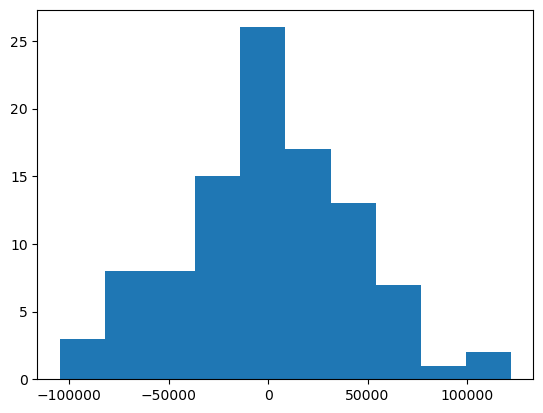

In [290]:
plt.hist(Y - predictions)

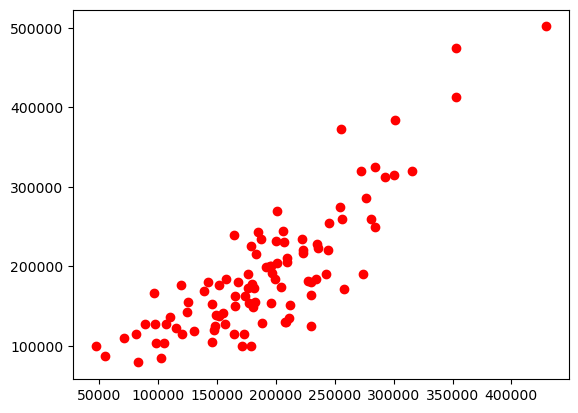

In [291]:
plt.scatter(predictions, Y, color = 'r')

#### Result from Testing Data
Oberving from the result, we can see the strength of linear correlation is slightly decreased (from 0.85 to 0.7), yet we can still say the linear correlation is strong. But the residuals are normally distributed this time, with a similar linear scatter plot. We could see this is a fairly good result on the test data.

[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?



In conclusion, the linear regression model built by the variables I selected gave a better result compared with Dr.Williams' model. It gives a higher R-squared value indicating a stronger linear relationship and also a reasonable result of applying on the test data. However, it's also observed that outliers exist in my model, which brings the histogram of residual is not normally distributed. To further evaluate this model, we should find the exact outliers and make update on them to let the residual distribution look better.

There are mainly two points I learnt from this project:
1. To select the variables with stronger correlation with the independent variable. This is significant because if the variables is initially weak correlated with the independent variable, it won't give us a favorable model result. By doing this, we should be patient on comparing the correlation between similar variables.
2. To deal with null values plays another important role. In the test data, if I leave the null values in the table, the model will run into an error as many null values exists in the data. We should also be careful when selecting to drop the null value or replace the null value with 0. In my model, it would be reasonable to replace the null value with other values rather than 0 to get a better residual distribution.


Khandelwal, Renu. "Linear Regression". _Medium_, https://medium.datadriveninvestor.com/linear-regression-794f841adbcf